# Superfluid Customers Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")

In [ ]:
path = '/content/'
cust = pd.read_csv(path + 'customer_information.csv', parse_dates=['last_log_date','sign_up_date'],
                 infer_datetime_format=True)
sms = pd.read_csv(path + 'sms_purchase_data.csv', parse_dates=['sms_purchase_date'],
                 infer_datetime_format=True)

## Introduction

Superfluid, a data analytics company with clients from Africa, Europe and the US, has provided a dataset from its client to be analysed. The goal of this analysis is to determine which customers of the client's are inactive/dormant and what the client can do to increase usage and activity of the customers.

The analysis will be done in the following stages:

1. Overview of the general information of the dataset to provide the big picture of the data of which we are about to analyse.
2. Data preprocessing which shall include finding and replacing missing values and errors, removing duplicates, converting data types to optimise the analysis.
3. Data categorisation and transformation for exploratory data analysis to view the correlation between multiple parameters and users' activity.
4. Drawing conclusions as to how to increase user activity.

The presentation can be found here https://drive.google.com/file/d/167bsUEUMRSNP9ovxKJj5bS4xGLAnS5M4/view?usp=sharing 

In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       1335 non-null   int64         
 1   id               1335 non-null   object        
 2   first_name       1335 non-null   object        
 3   last_name        1335 non-null   object        
 4   customer_gender  1335 non-null   object        
 5   email            1335 non-null   object        
 6   sign_up_date     1335 non-null   datetime64[ns]
 7   last_log_date    1335 non-null   datetime64[ns]
 8   country          1335 non-null   object        
 9   city             1335 non-null   object        
 10  Industry         1335 non-null   object        
 11  Size             478 non-null    object        
 12  Goal             1335 non-null   object        
 13  Role             1335 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(1

In [ ]:
cust.head()

,Unnamed: 0,id,first_name,last_name,customer_gender,email,sign_up_date,last_log_date,country,city,Industry,Size,Goal,Role
0,0,00070d10-18b4-4760-bf93-38319538328e,Jose,Oconnell,Male,jose.oconnell@gmail.com,2018-09-14,2018-09-22,Rwanda,Nyanza,Retail,NaN,Keep in Touch with Current Customers,Sales
1,1,0012c086-da35-43bb-a340-989387f09bb6,Tamara,Davis,Female,tamara.davis@gmail.com,2018-03-03,2018-03-19,Kenya,Mombasa,Technology,NaN,To Integrate API or services in my project,Technology
2,2,0026bcdb-bf74-4ce4-869d-2da38543d224,Mr.,David Lee MD,Male,mr..david lee md@gmail.com,2018-08-28,2018-08-28,Rwanda,Kigali,Retail,1-10,To Integrate API or services in my project,Technology
3,5,003ad45e-07d5-11e6-b242-00185176683e,Matthew,Hunter,Male,matthew.hunter@gmail.com,2013-04-22,2018-11-17,Rwanda,Kigali,Technology,NaN,Keep in Touch with Current Customers,Technology
4,12,006e0f5a-450a-48b1-bff5-9ac99a57e401,Frank,Gray,Male,frank.gray@gmail.com,2018-07-30,2018-08-05,Kenya,Mombasa,Technology,NaN,Keep in Touch with Current Customers,Operations


In [ ]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4057 entries, 0 to 4056
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         4057 non-null   int64         
 1   user_id            4057 non-null   object        
 2   sms_purchase_date  4057 non-null   datetime64[ns]
 3   sms_requested      4057 non-null   int64         
 4   total_cost_usd     4057 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 158.6+ KB


In [ ]:
sms.head()

,Unnamed: 0,user_id,sms_purchase_date,sms_requested,total_cost_usd
0,2,c4a77fa8-ed6f-11df-a1f1-00185176683e,2007-11-16,200,4.0000
1,3,c4a77fa8-ed6f-11df-a1f1-00185176683e,2007-11-18,20,0.4000
2,9,c4a77fa8-ed6f-11df-a1f1-00185176683e,2007-12-08,600,12.0000
3,25,c4a77fa8-ed6f-11df-a1f1-00185176683e,2008-01-06,2,0.0400
4,28,c4a77fa8-ed6f-11df-a1f1-00185176683e,2008-01-12,2,0.0384


Based on the first glance of the datasets, we found:
1. Customer dataset has 14 columns, each customer has a customer ID to avoid duplicated names. 
2. The size column has some missing values, so we will have to decide what to do with them.
3. SMS dataset has 5 columns and they comprise the SMS purchase made by the customers.
4. It is unclear what is "unnamed: 0" column.

Now we will proceed with preprocessing the datasets.

## Data Preprocessing

The columns are not uniform so we will lowercase them for ease of analysis.

In [ ]:
cust.columns = cust.columns.str.lower()
sms.columns = sms.columns.str.lower()

In [ ]:
cust.isna().sum()

unnamed: 0           0
id                   0
first_name           0
last_name            0
customer_gender      0
email                0
sign_up_date         0
last_log_date        0
country              0
city                 0
industry             0
size               857
goal                 0
role                 0
dtype: int64

In [ ]:
cust.loc[cust['size'].isna()].head()

,unnamed: 0,id,first_name,last_name,customer_gender,email,sign_up_date,last_log_date,country,city,industry,size,goal,role
0,0,00070d10-18b4-4760-bf93-38319538328e,Jose,Oconnell,Male,jose.oconnell@gmail.com,2018-09-14,2018-09-22,Rwanda,Nyanza,Retail,NaN,Keep in Touch with Current Customers,Sales
1,1,0012c086-da35-43bb-a340-989387f09bb6,Tamara,Davis,Female,tamara.davis@gmail.com,2018-03-03,2018-03-19,Kenya,Mombasa,Technology,NaN,To Integrate API or services in my project,Technology
3,5,003ad45e-07d5-11e6-b242-00185176683e,Matthew,Hunter,Male,matthew.hunter@gmail.com,2013-04-22,2018-11-17,Rwanda,Kigali,Technology,NaN,Keep in Touch with Current Customers,Technology
4,12,006e0f5a-450a-48b1-bff5-9ac99a57e401,Frank,Gray,Male,frank.gray@gmail.com,2018-07-30,2018-08-05,Kenya,Mombasa,Technology,NaN,Keep in Touch with Current Customers,Operations
5,17,00ac3875-a5d5-4fed-aa71-d6a08f5124dd,Jason,Hall,Male,jason.hall@gmail.com,2018-03-03,2018-03-03,Kenya,Kisumu,Advertising,NaN,Keep in Touch with Current Customers,Marketing


In [ ]:
cust['size'].value_counts()

1-10          274
10-100        125
100-500        36
1000-above     26
500-1000       17
Name: size, dtype: int64

The missing values at size columns are totally random, it could be an error during data entry, so we will fill them with zero for now.

In [ ]:
cust['size'] = cust['size'].fillna(value=0)

In [ ]:
cust['customer_gender'] = cust['customer_gender'].astype('category')
cust['country'] = cust['country'].astype('category')

In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   unnamed: 0       1335 non-null   int64         
 1   id               1335 non-null   object        
 2   first_name       1335 non-null   object        
 3   last_name        1335 non-null   object        
 4   customer_gender  1335 non-null   category      
 5   email            1335 non-null   object        
 6   sign_up_date     1335 non-null   datetime64[ns]
 7   last_log_date    1335 non-null   datetime64[ns]
 8   country          1335 non-null   category      
 9   city             1335 non-null   object        
 10  industry         1335 non-null   object        
 11  size             1335 non-null   object        
 12  goal             1335 non-null   object        
 13  role             1335 non-null   object        
dtypes: category(2), datetime64[ns](2), int64

In [ ]:
sms = sms.rename(columns={"user_id":"id"})

In [ ]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4057 entries, 0 to 4056
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   unnamed: 0         4057 non-null   int64         
 1   id                 4057 non-null   object        
 2   sms_purchase_date  4057 non-null   datetime64[ns]
 3   sms_requested      4057 non-null   int64         
 4   total_cost_usd     4057 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 158.6+ KB


In this section we have:
1. Identified and filled in missing values.
2. Changed data types for optimising the dataset.
3. Made the column names uniformed so it'll be easier during analysis.

## Exploratory Data Analysis

In [ ]:
# first we need to check if both dataset have the same amount of unique users
print('Unique users in customer dataset:', cust['id'].nunique())
print('Unique users in SMS dataset:', sms['id'].nunique())

Unique users in customer dataset: 1335
Unique users in SMS dataset: 494


They don't have the same amount of unique users, some users may overlap but it may complicate the analysis so we don't merge the dataset for now.

### Sign Up Date

In [ ]:
print(cust['sign_up_date'].min())
print(cust['sign_up_date'].max())

2007-11-12 00:00:00
2018-11-17 00:00:00


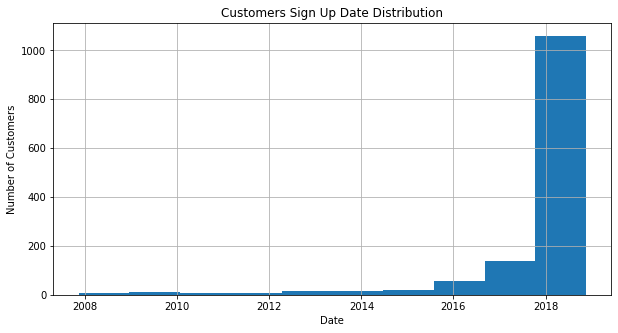

In [ ]:
cust['sign_up_date'].hist(bins=10, figsize=(10,5))
plt.title('Customers Sign Up Date Distribution')
plt.xlabel('Date')
plt.ylabel('Number of Customers');

The sign up date has a range of 11 years, from end of 2007 to end of 2018. As we can see in the histogram, the amount of users signing up saw some growth from 2015 onwards and a totally significant growth in 2018, more than 5 times the amount of users in the preceding year. This could be due to successful marketing effort. We will see later on if the new users behaviour also brings in more revenue for the company. 

### Last Log Date

In [ ]:
print(cust['last_log_date'].min())
print(cust['last_log_date'].max())

2018-02-27 00:00:00
2018-11-17 00:00:00


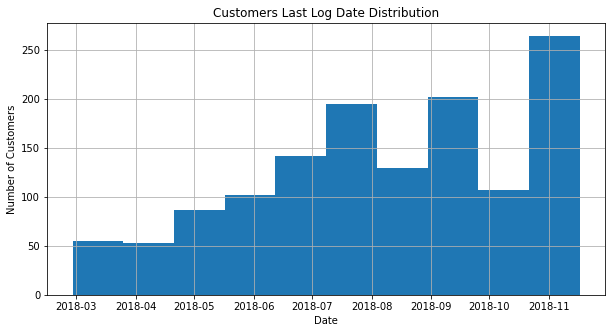

In [ ]:
cust['last_log_date'].hist(bins=10, figsize=(10,5))
plt.title('Customers Last Log Date Distribution')
plt.xlabel('Date')
plt.ylabel('Number of Customers');

All of the customers last logged in the past year and around 250+ users are in the last month. This isn't necessarily good as we expect more customers to have last log in the past 3 months. We will inspect users activity further below.

In [ ]:
# group customers activity
def activity(date):
    if date < pd.to_datetime("2018-08-17"):
        return 'inactive'
    else:
        return 'active'
    
cust['log_activity'] = cust['last_log_date'].apply(activity)

In [ ]:
def new_user(date):
    if date > pd.to_datetime("2018-01-01"):
        return '1'
    elif pd.to_datetime("2014-01-01") > date < pd.to_datetime("2017-12-31"):
        return '2-3'
    else:
        return '3+'

cust['user_age'] = cust['sign_up_date'].apply(new_user)

In [ ]:
old = cust[cust['user_age'] != '1']
log_dormant = cust.query('log_activity == "inactive"')
old_dormant = old.query('id in @log_dormant.id')
new_dormant = cust[cust['user_age'] == '1'].query('id in @log_dormant.id')

In [ ]:
print('Number of customers signing up before 2018:', old['id'].nunique()) 
print('Percentage of those customers over all customers: {:.2%}'.format(old['id'].nunique() / cust['id'].nunique()))

Number of customers signing up before 2018: 320
Percentage of those customers over all customers: 23.97%


In [ ]:
print("Number of customers who haven't logged in the last 3 months:", log_dormant['id'].nunique()) 
print('Percentage of those customers over all customers: {:.2%}'.format(log_dormant['id'].nunique() / cust['id'].nunique()))

Number of customers who haven't logged in the last 3 months: 697
Percentage of those customers over all customers: 52.21%


In [ ]:
print("Number of customers who signed up before 2018 and haven't logged in the last 3 months:", old_dormant['id'].nunique())
print('Percentage of those customers over all customers who signed up before 2018: {:.2%}'.format(old_dormant['id'].nunique() / len(old['id'])))
print()
print("Number of customers who signed up after 2018 and haven't logged in the last 3 months:", new_dormant['id'].nunique())
print('Percentage of those customers over all customers who signed up after 2018: {:.2%}'.format(new_dormant['id'].nunique() / len(cust[cust['user_age'] == '1']['id'])))

Number of customers who signed up before 2018 and haven't logged in the last 3 months: 99
Percentage of those customers over all customers who signed up before 2018: 30.94%

Number of customers who signed up after 2018 and haven't logged in the last 3 months: 598
Percentage of those customers over all customers who signed up after 2018: 58.92%


As seen in the histogram, more than 75% of users sign up in 2018 (new users). There are more than 52% of users who haven't logged in the last 3 months. Out of that number, nearly 60% of the new users are inactive compared to only 31% of old users. Therefore, despite the high sign up rate in 2018, those users also have low activity. 

We need to look into why this might be happening, the better reason is that might be because the goal that they had during sign up process is already achieved, the worse reason would be because the users are unable to achieve their goal, hence they find our service useless and stop using it.

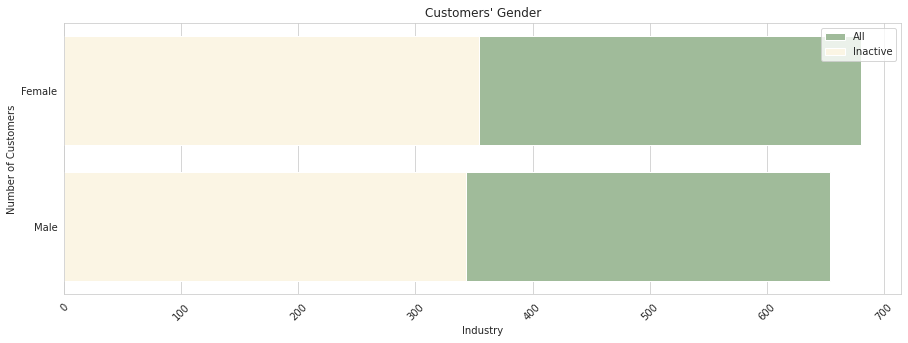

In [ ]:
cust_gender = cust.groupby('customer_gender').agg({'id': 'nunique'}).reset_index()
cust_gender.columns = ['gender', 'n_cust']

dormant_gender = log_dormant.groupby('customer_gender').agg({'id': 'nunique'}).reset_index()
dormant_gender.columns = ['gender', 'n_cust']

plt.figure(figsize=(15,5))

sns.set_style("whitegrid")

ax1 = sns.barplot(x='n_cust', y='gender', data=cust_gender, color='#9CC094', label='All')
ax2 = sns.barplot(x='n_cust', y='gender', data=dormant_gender, color="#FFF7E0", label='Inactive')
fig = ax1, ax2

plt.title("Customers' Gender")
plt.xlabel('Industry')
plt.ylabel('Number of Customers')

plt.legend()
plt.xticks(rotation=45)
plt.show();

Based on the bar chart, our user base is quite balanced in terms of gender. Females are leading and also inactive by a tiny margin.

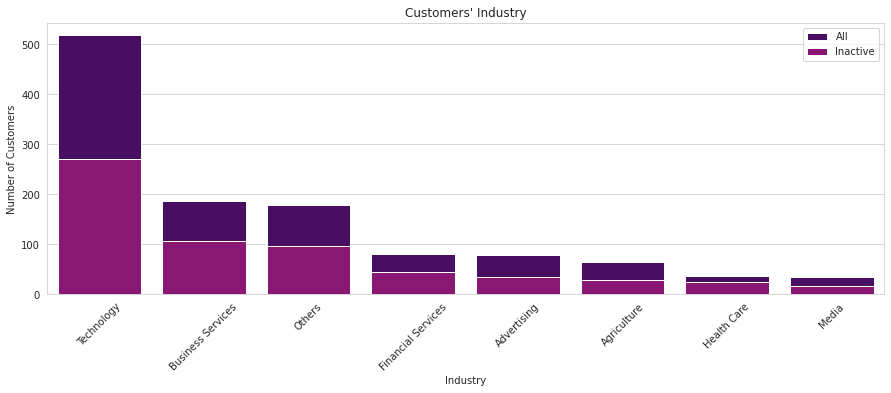

In [ ]:
cust_industry = cust.groupby('industry').agg({'id': 'nunique'}).reset_index()
cust_industry.columns = ['industry', 'n_cust']

dormant_industry = log_dormant.groupby('industry').agg({'id': 'nunique'}).reset_index()
dormant_industry.columns = ['industry', 'n_cust']

plt.figure(figsize=(15,5))

sns.set_style("whitegrid")

ax1 = sns.barplot(x='industry', y='n_cust', data=cust_industry.sort_values(by='n_cust', ascending=False).head(8), color='#4C0070', label= 'All')
ax2 = sns.barplot(x='industry', y='n_cust', data=dormant_industry.sort_values(by='n_cust', ascending=False).head(8), color="#9A0680", label='Inactive')
fig = ax1, ax2

plt.title("Customers' Industry")
plt.xlabel('Industry')
plt.ylabel('Number of Customers')

plt.legend()
plt.xticks(rotation=45)
plt.show();

In the bar chart above, most users are from tech industry and business services. These industries also have the most inactive users.

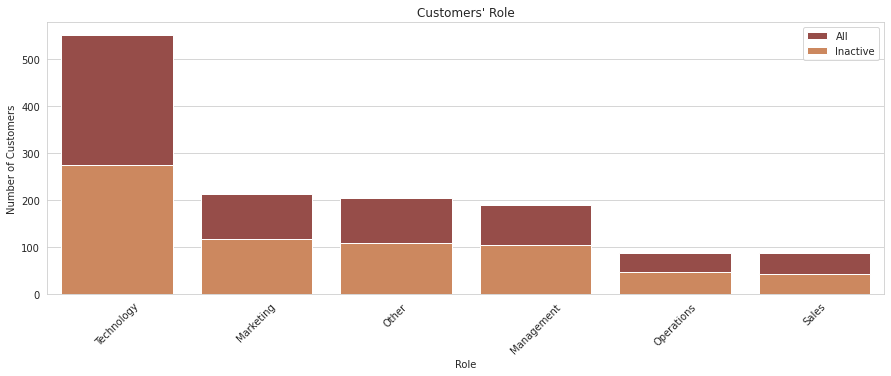

In [ ]:
cust_role = cust.groupby('role').agg({'id': 'nunique'}).reset_index()
cust_role.columns = ['role', 'n_cust']

dormant_role = log_dormant.groupby('role').agg({'id': 'nunique'}).reset_index()
dormant_role.columns = ['role', 'n_cust']

plt.figure(figsize=(15,5))

sns.set_style("whitegrid")
ax1 = sns.barplot(x='role', y='n_cust', data=cust_role.sort_values(by='n_cust', ascending=False), color="#A3423C", label='All')
ax2 = sns.barplot(x='role', y='n_cust', data=dormant_role.sort_values(by='n_cust', ascending=False), color="#DE834D", label='Inactive')
fig = ax1, ax2

plt.title("Customers' Role")
plt.xlabel('Role')
plt.ylabel('Number of Customers')

plt.legend()
plt.xticks(rotation=45)
plt.show();

Reflecting the findings in gender and industry bar charts, most users are from tech and marketing department, but those two roles are also having the most inactive users.

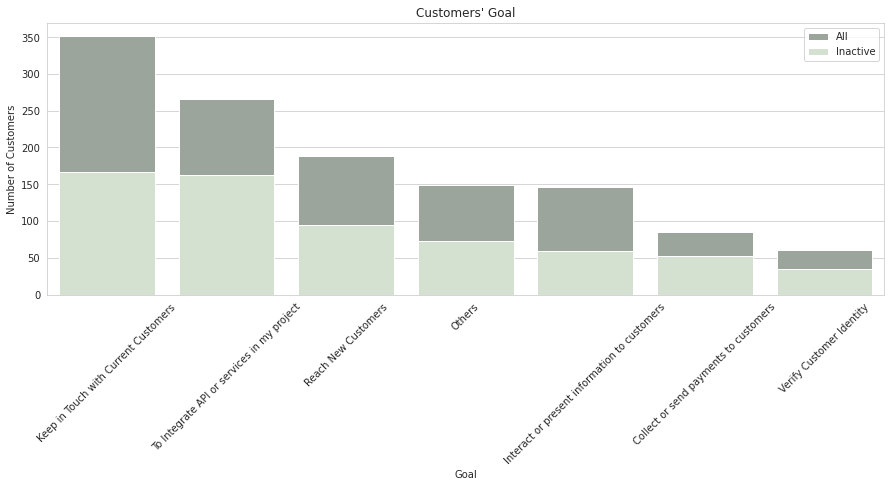

In [ ]:
cust_goal = cust.groupby('goal').agg({'id': 'nunique'}).reset_index()
cust_goal.columns = ['goal', 'n_cust']

dormant_goal = log_dormant.groupby('goal').agg({'id': 'nunique'}).reset_index()
dormant_goal.columns = ['goal', 'n_cust']

plt.figure(figsize=(15,5))

sns.set_style("whitegrid")
ax1 = sns.barplot(x='goal', y='n_cust', data=cust_goal.sort_values(by='n_cust', ascending=False).head(7), color="#99A799", label='All')
ax2 = sns.barplot(x='goal', y='n_cust', data=dormant_goal.sort_values(by='n_cust', ascending=False).head(7), color="#D3E4CD", label='Inactive')
fig = ax1, ax2

plt.title("Customers' Goal")
plt.xlabel('Goal')
plt.ylabel('Number of Customers')

plt.legend()
plt.xticks(rotation=45)
plt.show();

Most users use the service to "keep in touch with current customers", followed by "to integrate API". These two goals have similar amount of inactive users.

### SMS Purchase Date

In [ ]:
print(sms['sms_purchase_date'].min())
print(sms['sms_purchase_date'].max())

2007-11-16 00:00:00
2018-11-17 00:00:00


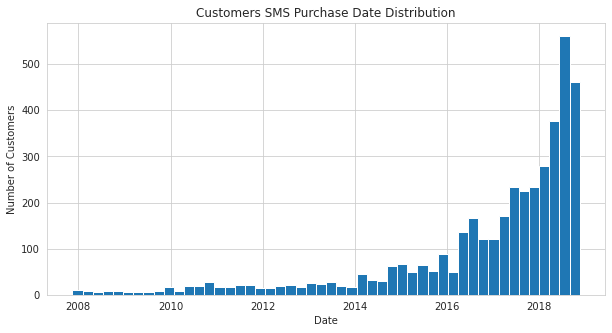

In [ ]:
sms['sms_purchase_date'].hist(bins=50, figsize=(10,5))
plt.title('Customers SMS Purchase Date Distribution')
plt.xlabel('Date')
plt.ylabel('Number of Customers');

We can see in the histogram that the SMS purchase pattern is similar to the sign up date. From 2015 the purchase grew exponentially until the peak in mid 2018, before going down towards the end of 2018.

In [ ]:
last_purchase = sms.groupby('id').agg({'sms_purchase_date': 'max'})
last_purchase.columns = ['sms_last_purchase']

In [ ]:
sms = sms.merge(last_purchase, on='id', how='inner')

In [ ]:
sms['sms_activity'] = sms['sms_last_purchase'].apply(activity)
sms_dormant = sms.query('sms_activity == "inactive"')

In [ ]:
print("Number of customers who haven't purchased SMS in the last 3 months:", sms_dormant['id'].nunique()) 
print('Percentage of those customers over all SMS customers: {:.2%}'.format(sms_dormant['id'].nunique() / sms['id'].nunique()))

Number of customers who haven't purchased SMS in the last 3 months: 288
Percentage of those customers over all SMS customers: 58.30%


There are more than 58% of users who haven't purchased SMS in the last 3 months. Let's see how it relates to the purchase frequency, average purchase amount and the total cost of their purchase.

In [ ]:
sms_frequency = sms.groupby('id').agg({'sms_purchase_date': 'count', 'sms_requested': ['sum', 'mean'], 'total_cost_usd': 'sum'}).reset_index()
sms_frequency.columns = ['id', 'frequency', 'total_sms', 'avg_sms', 'total_cost']

In [ ]:
sms_frequency = sms_frequency.merge(last_purchase, on='id', how='inner')

In [ ]:
sms_frequency['sms_activity'] = sms_frequency['sms_last_purchase'].apply(activity)

In [ ]:
sms_frequency.head()

,id,frequency,total_sms,avg_sms,total_cost,sms_last_purchase,sms_activity
0,003ad45e-07d5-11e6-b242-00185176683e,9,2964,329.333333,15.2784,2018-11-13,active
1,021e1676-27e8-11e2-8dad-00185176683e,17,248076,14592.705882,2298.1760,2018-10-09,active
2,02304038-f009-11e1-be54-00185176683e,1,200,200.000000,2.0000,2018-10-09,active
3,02355c42-6343-45e9-afa6-4c83bc6acaad,3,20802,6934.000000,160.0152,2018-10-02,active
4,024e3677-6bd0-46b2-8bb5-d5fe876c8cd5,2,200,100.000000,0.0800,2018-07-17,inactive


We can see that the amount of total SMS is varied a lot, it might be good to check for outliers that may affect our analysis.

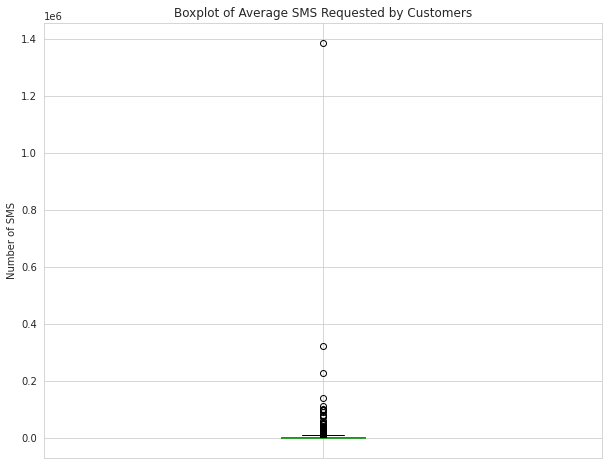

In [ ]:
sms_frequency['avg_sms'].plot(kind='box', figsize=(10,8), grid=True)
plt.title('Boxplot of Average SMS Requested by Customers')
plt.xticks([1], [])
plt.ylabel('Number of SMS');

By looking at the boxplot above, we can see that there are a lot of outliers up to 1.4 million texts! We will filter the dataset to 50000 texts.

In [ ]:
sms_frequency_filtered = sms_frequency.query('avg_sms < 50000')
len(sms_frequency_filtered) / len(sms_frequency)

0.9615384615384616

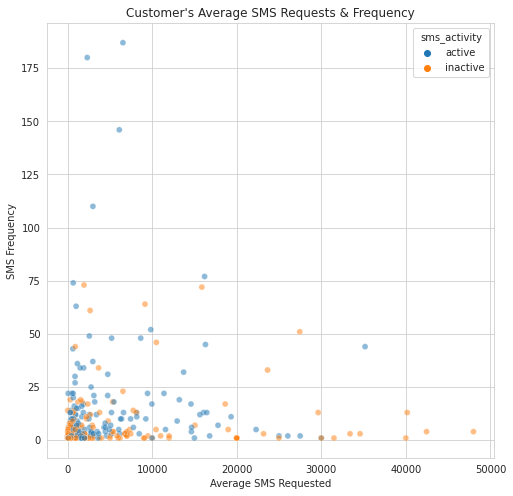

In [ ]:
plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
sns.scatterplot(x="avg_sms", y="frequency", hue='sms_activity', data=sms_frequency_filtered, alpha=0.5)

plt.title("Customer's Average SMS Requests & Frequency")
plt.xlabel('Average SMS Requested')
plt.ylabel('SMS Frequency');

In the scatterplot above, we can see that there is no big difference in patterns of behaviour between active and inactive users. Active users tend to have higher SMS frequency and lower SMS requests. While inactive users tend to request more SMS but less frequently.

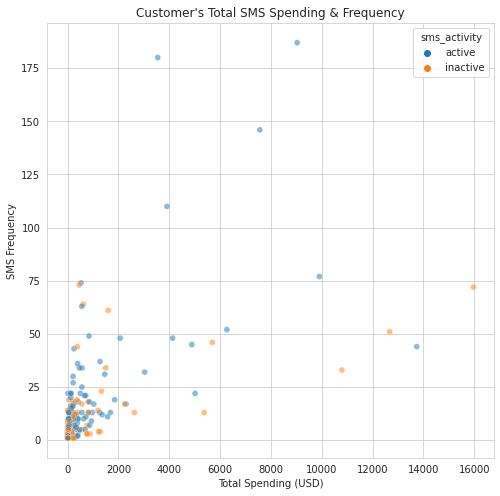

In [ ]:
plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
sns.scatterplot(x="total_cost", y="frequency", hue='sms_activity', data=sms_frequency_filtered, alpha=0.5)

plt.title("Customer's Total SMS Spending & Frequency")
plt.xlabel('Total Spending (USD)')
plt.ylabel('SMS Frequency');

In the scatterplot above, again there is no big difference between active and inactive users heaviour patterns. Active users tend to have higher SMS frequency and lower spending. While inactive users tend to spend more but less frequently.

## Overall Conclusions

1. Despite the high sign up rate in 2018, those users also have low activity. Nearly 60% of the new users haven’t had any activity in the last 3 months. There are more than 58% of users who haven't purchased SMS in the last 3 months.
2. Possible reasoning to that might be because the goal that they had during sign up process is already achieved or users are unable to achieve their goal, hence they find our service useless and stop using it.
3. To increase users’ usage it might be beneficial to conduct further survey or interview to understand the reason of inactivity. 
4. If it’s because the goal is achieved, we need to focus our marketing to get users who will maintain the goal each month.
5. If it’s because the goal is not achieved, we need to fix our product and service to get regular usage from the customers.
